In [79]:
"""
@author: mdigi14

Adapted from 'rarity_map.ipynb'
Shows graph of Token Mint Date vs Token Rarity
"""

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

"""
Update Parameters Here
"""
FILE = "Superlative_Secret_Society"
TOKEN_COL = 'TOKEN_ID'

"""
override = 0 for auto parameters
override = 1 for custom parameters
"""
override = 0 # set to 0 for auto parameters

if override == 0:
    TOP_N = max(RARITY_DB['TOKEN_ID'])
else: # set your custom parameters
    START_DATE = "2021-09-17T12:10:00"
    END_DATE = "2021-09-20T12:10:00"
    TOP_N = 5000

"""
Helper Functions
"""

def print_graph(RARITY_DB):
    if TOKEN_COL == 'TOKEN_NAME':
        RARITY_DB['TOKEN_ID'] = RARITY_DB['TOKEN_NAME'].str.split('#').str[1].astype(int)
        
    # convert column 'time' to python datetime format
    mintTime = [dt.datetime.strptime(d, '%Y-%m-%dT%H:%M:%S')for d in RARITY_DB['time']]
    
    # add new column to dataframe
    RARITY_DB = RARITY_DB.assign(mintDate=mintTime)
    
    # define x-axis limits
    if override == 0:
        LOWER_BOUND = min(mintTime)
        UPPER_BOUND = max(mintTime)
    else:
        LOWER_BOUND = dt.datetime.strptime(START_DATE, '%Y-%m-%dT%H:%M:%S')
        UPPER_BOUND = dt.datetime.strptime(END_DATE, '%Y-%m-%dT%H:%M:%S')   
    
    ax = RARITY_DB.plot.scatter(x='mintDate', y='rank', grid=True, alpha=.25, title= "{} - Mint date vs Rank (low rank is more rare)".format(FILE), figsize=(14, 7))
    
    ax.set_xlabel("Mint date")
    ax.set_ylabel("Rarity Rank")
    plt.xlim(LOWER_BOUND, UPPER_BOUND)
    plt.ylim(0, TOP_N)


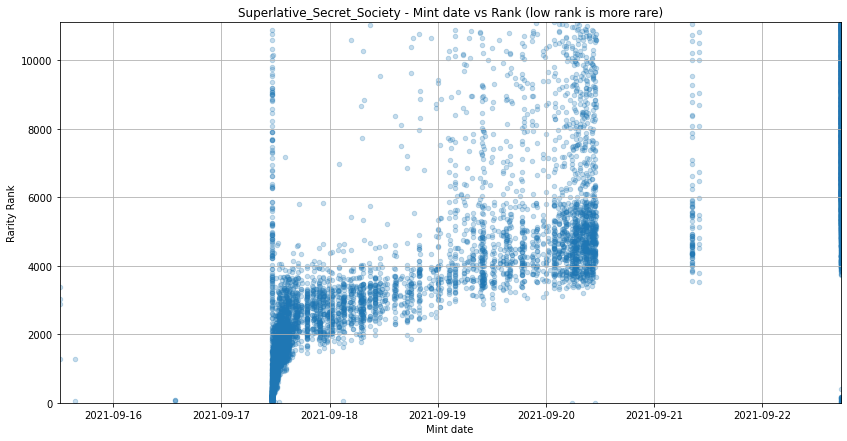

In [80]:
"""
Generate Plot
"""

PATH = "../minting_data/{}_minting.csv".format(FILE)
RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB['TOKEN_ID'].duplicated() == False]
print_graph(RARITY_DB)